In [1]:
from datetime import datetime as dt
from datetime import date
from datetime import timedelta as timedelta
from dateutil.relativedelta import relativedelta
from collections import Counter

import math

import pandas as pd
import numpy as np

import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline  

Число дней от регистрации на сайте до первой покупки будем называть скоростью утилизации.

В приложенном файле таблица со следующими полями:

client_id -- id клиента, зарегистрированного на сайте
birth_dt -- дата его рождения
reg_dttm -- дата и время регистрации на сайте данного клиента
purchase_id -- id покупки
purchase_dt -- дата покупки
purchase_amt -- сумма покупки

Если данные по покупке пустые -- клиент не совершил утилизации.

Постройте диаграмму (или график), которая показывает, как менялось множество клиентов по возрасту с течением времени.


In [2]:
df = pd.read_excel('tinkoff_vis.xls')

In [3]:
df

,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt
0,820519,1990-05-10,2019-01-02 12:49:39,NaN,NaT,NaN
1,820521,1970-03-23,2019-01-02 14:14:39,NaN,NaT,NaN
2,820523,1991-04-01,2019-01-02 19:51:19,1.204926e+09,2019-02-12,500.0
3,820526,1985-04-27,2019-01-02 18:09:39,NaN,NaT,NaN
4,820544,1991-05-03,2019-01-03 12:24:42,NaN,NaT,NaN
...,...,...,...,...,...,...
2372,835630,1991-01-05,2019-04-05 11:00:17,NaN,NaT,NaN
2373,835634,1991-09-06,2019-04-05 12:19:05,1.299279e+09,2019-04-07,4000.0
2374,835650,1993-09-02,2019-04-05 12:26:39,1.299387e+09,2019-04-08,1500.0
2375,835666,1998-05-15,2019-04-05 13:16:37,NaN,NaT,NaN


In [4]:
reg_dt = list(map(lambda x: dt.date(x), df['reg_dttm'].tolist()))
client_age = list(map(lambda x: relativedelta(dt.now(), x).years , df['birth_dt']))

df0 = pd.DataFrame(zip(reg_dt, client_age), columns = ['reg_dt', 'client_age'])
df0

,reg_dt,client_age
0,2019-01-02,30
1,2019-01-02,51
2,2019-01-02,30
3,2019-01-02,36
4,2019-01-03,30
...,...,...
2372,2019-04-05,30
2373,2019-04-05,29
2374,2019-04-05,27
2375,2019-04-05,22


In [5]:
def find_age_groups(ages):
    age_groups_list = []
    for age in ages:
        if 18 <= age < 25:
           age_groups_list.append('18-24') 
        elif 25 <= age < 35:
            age_groups_list.append('25-34')
        elif 35 <= age < 45:
            age_groups_list.append('35-44')
        elif age >= 45:
            age_groups_list.append('45+')
    return age_groups_list

In [6]:
df0.loc[:, 'age_group'] = find_age_groups(client_age)

In [7]:
sorted_df0 = df0.sort_values(by = 'reg_dt').drop(['client_age'], axis = 1)
sorted_df0

,reg_dt,age_group
0,2019-01-02,25-34
1,2019-01-02,45+
2,2019-01-02,25-34
3,2019-01-02,35-44
4,2019-01-03,25-34
...,...,...
2375,2019-04-05,18-24
2372,2019-04-05,25-34
2373,2019-04-05,25-34
2374,2019-04-05,25-34


In [14]:
groups_by_date_dict = {date: list(sorted_df0.groupby('reg_dt').get_group(date)['age_group'].values) for date in sorted_df0['reg_dt'].unique()}

In [11]:
cum_by_date_dict = {k: Counter(v) for k, v in groups_by_date_dict.items()}
cum_by_date_dict

{datetime.date(2019, 1, 2): Counter({'25-34': 2, '45+': 1, '35-44': 1}),
 datetime.date(2019, 1, 3): Counter({'25-34': 1, '18-24': 1}),
 datetime.date(2019, 1, 4): Counter({'35-44': 2, '25-34': 1}),
 datetime.date(2019, 1, 5): Counter({'35-44': 1, '45+': 3, '25-34': 1}),
 datetime.date(2019, 1, 6): Counter({'18-24': 4, '45+': 1, '35-44': 1}),
 datetime.date(2019, 1, 7): Counter({'25-34': 1, '45+': 1}),
 datetime.date(2019, 1, 8): Counter({'18-24': 3,
          '25-34': 5,
          '35-44': 6,
          '45+': 8}),
 datetime.date(2019, 1, 9): Counter({'45+': 3,
          '18-24': 9,
          '35-44': 2,
          '25-34': 2}),
 datetime.date(2019, 1, 10): Counter({'18-24': 8,
          '25-34': 18,
          '45+': 2,
          '35-44': 1}),
 datetime.date(2019, 1, 11): Counter({'18-24': 8,
          '25-34': 7,
          '45+': 2,
          '35-44': 3}),
 datetime.date(2019, 1, 12): Counter({'45+': 2,
          '35-44': 4,
          '18-24': 1,
          '25-34': 1}),
 datetime.date(

In [11]:
cum_by_date = pd.DataFrame(cum_by_date_dict).fillna(0).cumsum(axis = 1).reindex(['18-24','25-34', '35-44','45+'])
cum_by_date

,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,...,2019-03-25,2019-03-26,2019-03-27,2019-03-28,2019-03-29,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05
18-24,0.0,1.0,1.0,1.0,5.0,5.0,8.0,17.0,25.0,33.0,...,781.0,800.0,819.0,833.0,848.0,860.0,869.0,872.0,874.0,875.0
25-34,2.0,3.0,4.0,5.0,5.0,6.0,11.0,13.0,31.0,38.0,...,776.0,788.0,798.0,806.0,817.0,821.0,827.0,829.0,831.0,835.0
35-44,1.0,1.0,3.0,4.0,5.0,5.0,11.0,13.0,14.0,17.0,...,371.0,374.0,375.0,378.0,380.0,381.0,384.0,384.0,384.0,384.0
45+,1.0,1.0,1.0,4.0,5.0,6.0,14.0,17.0,19.0,21.0,...,272.0,274.0,275.0,279.0,281.0,282.0,283.0,283.0,283.0,283.0


Text(0.5, 1.0, 'Динамика изменения численности клиентов')

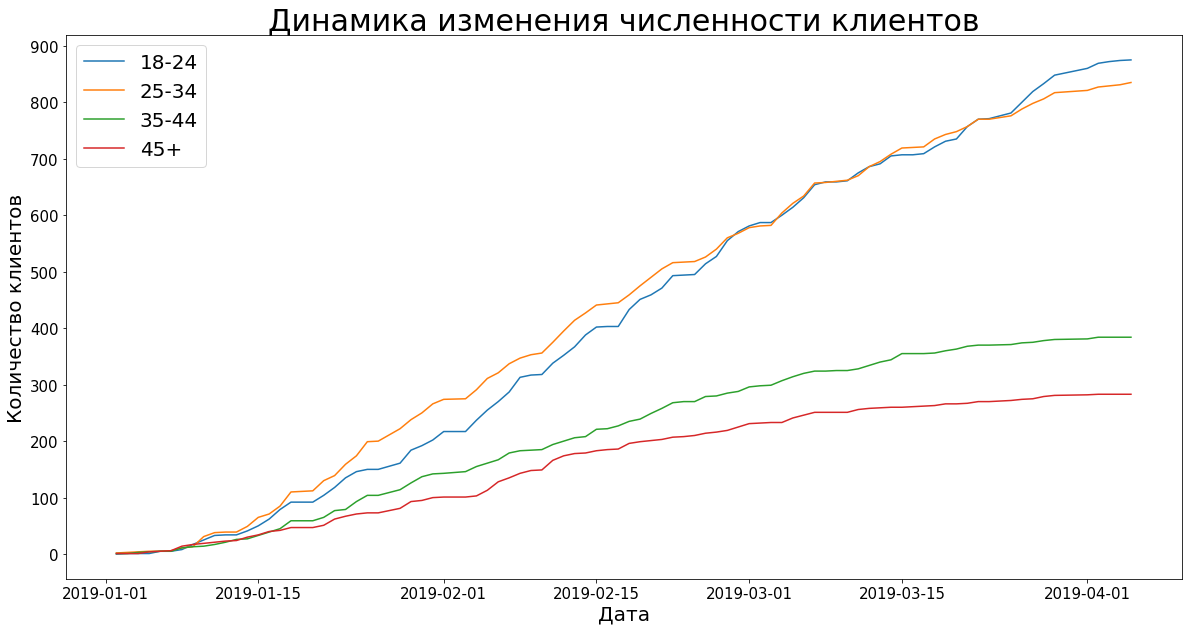

In [12]:
plt1 = cum_by_date.transpose().plot(figsize = (20, 10))
plt1.legend(fontsize=20)
plt1.set_yticks(np.arange(0, 1000, step = 100))
plt1.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Дата', fontsize = 20)
plt.ylabel('Количество клиентов', fontsize = 20)
plt.title('Динамика изменения численности клиентов',fontsize=30,color='black')